In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
tempdata = pd.read_csv("monthly mean temp.csv", skiprows=[1, 148])
def remove_chars(s):
    return re.sub('[^0-9.-]+', '', s)
for i in tempdata.columns :
    if np.array_equal(tempdata[i], tempdata[i].astype(str)) :
        tempdata[i] = tempdata[i].apply(remove_chars).astype(float)

In [3]:
precdata = pd.read_csv("monthly precipitation.csv", skiprows=[0,2,149,150])
for i in precdata.columns :
    if np.array_equal(precdata[i], precdata[i].astype(str)) :
        precdata[i] = precdata[i].apply(remove_chars).astype(float)

In [4]:
humdata = pd.read_csv("monthly humidity.csv", skiprows=[0,148, 149])
for i in humdata.columns :
    if np.array_equal(humdata[i], humdata[i].astype(str)) :
        humdata[i] = humdata[i].apply(remove_chars).astype(float)

In [5]:
tempmean = tempdata[0:45]['Annual'].mean()

tempchng = pd.DataFrame(columns=['Year', 'ChngfrmAvg'])
for i in range(45,len(tempdata)):
    avchng = (tempdata.iloc[i]['Annual']-tempmean)/tempmean
    y = {'Year': tempdata.iloc[i]['Year'], 'ChngfrmAvg': avchng}
    y = pd.DataFrame(y, index=[i])
    tempchng = tempchng.append(y)

precmean = precdata[0:45]['Annual'].mean()

precchng = pd.DataFrame(columns=['Year', 'ChngfrmAvg'])
for i in range(45,len(precdata)):
    avchng = (precdata.iloc[i]['Annual']-precmean)/precmean
    y = {'Year': precdata.iloc[i]['Year'], 'ChngfrmAvg': avchng}
    y = pd.DataFrame(y, index=[i])
    precchng = precchng.append(y)
    
hummean = humdata[0:45]['Annual'].mean()

humchng = pd.DataFrame(columns=['Year', 'ChngfrmAvg'])
for i in range(45,len(humdata)):
    avchng = (humdata.iloc[i]['Annual']-hummean)/hummean
    y = {'Year': humdata.iloc[i]['Year'], 'ChngfrmAvg': avchng}
    y = pd.DataFrame(y, index=[i])
    humchng = humchng.append(y)

In [6]:
tempdataAA = pd.read_csv('ann arbor monthly mean temp.csv', 
                         skiprows=[0,2, 143, 144, 145, 146, 147])
tempdataAA.set_index('Year', inplace=True)
tempdataAA = pd.DataFrame((tempdataAA['Annual']-32)*(5/9))
tempdataAA = tempdataAA.reset_index()

In [7]:
precdataAA = pd.read_csv('ann arbor monthly total precipitation.csv',
                        skiprows=[0, 144, 145, 146, 147, 148])
precdataAA = precdataAA[~(precdataAA['Annual'] == 'M')]
precdataAA.set_index('Year', inplace=True)
precdataAA = pd.DataFrame(precdataAA['Annual'].astype(float)*25.4).reset_index()

In [8]:
tempchngAA = pd.DataFrame(columns=['Year', 'ChngfrmAvg'])
for i in range(39,len(tempdataAA)):
    avchng = (tempdataAA.iloc[i]['Annual']-tempmean)/tempmean
    y = {'Year': tempdataAA.iloc[i]['Year'], 'ChngfrmAvg': avchng}
    y = pd.DataFrame(y, index=[i])
    tempchngAA = tempchngAA.append(y)
    
precchngAA = pd.DataFrame(columns=['Year', 'ChngfrmAvg'])
for i in range(32,len(precdataAA)):
    avchng = (precdataAA.iloc[i]['Annual']-precmean)/precmean
    y = {'Year': precdataAA.iloc[i]['Year'], 'ChngfrmAvg': avchng}
    y = pd.DataFrame(y, index=[i])
    precchngAA = precchngAA.append(y)

<IPython.core.display.Javascript object>


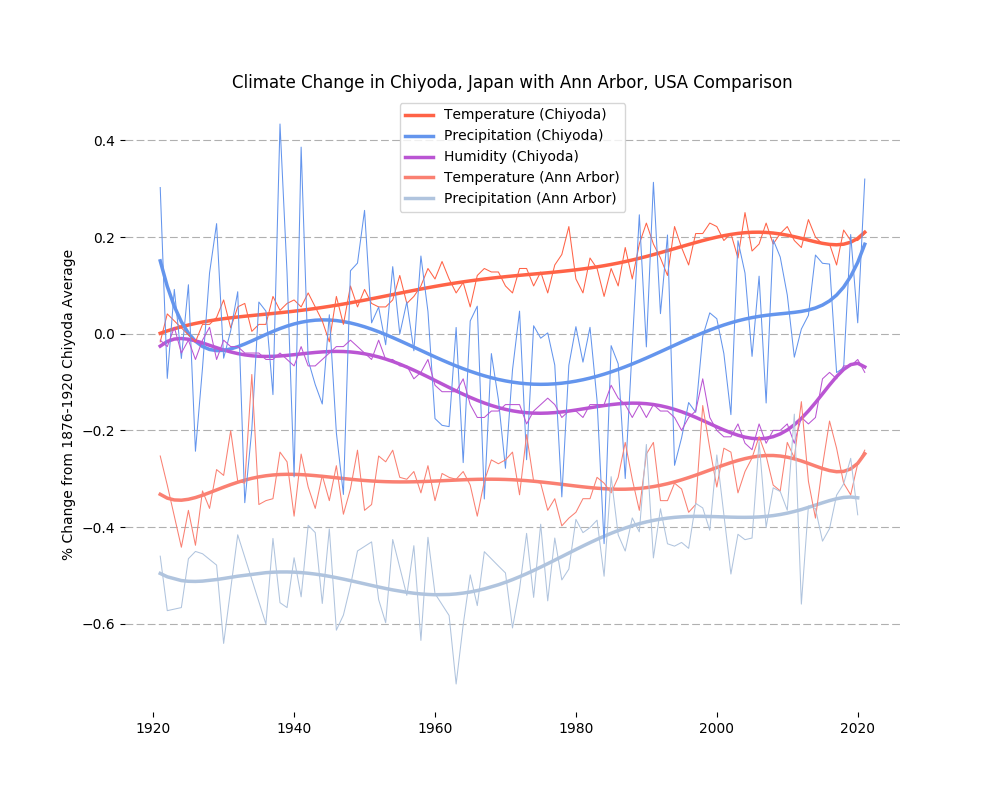

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:3: RankWarning: Polyfit may be poorly conditioned
  app.launch_new_instance()
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:6: RankWarning: Polyfit may be poorly conditioned
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:9: RankWarning: Polyfit may be poorly conditioned
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:13: RankWarning: Polyfit may be poorly conditioned
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:16: RankWarning: Polyfit may be poorly conditioned


In [9]:
plt.figure(figsize=(10,8))

poly = np.polyfit(tempchng['Year'],tempchng['ChngfrmAvg'],35)
poly_y = np.poly1d(poly)(tempchng['Year'])
plt.plot(tempchng['Year'],poly_y, c='tomato', linewidth=2.5)
poly2 = np.polyfit(precchng['Year'],precchng['ChngfrmAvg'],35)
poly_y2 = np.poly1d(poly2)(precchng['Year'])
plt.plot(precchng['Year'],poly_y2, c='cornflowerblue', linewidth=2.5)
poly3 = np.polyfit(humchng['Year'],humchng['ChngfrmAvg'],35)
poly_y3 = np.poly1d(poly3)(humchng['Year'])
plt.plot(humchng['Year'],poly_y3,c='mediumorchid', linewidth=2.5)

poly4 = np.polyfit(tempchngAA['Year'],tempchngAA['ChngfrmAvg'],35)
poly_y4 = np.poly1d(poly4)(tempchngAA['Year'])
plt.plot(tempchngAA['Year'],poly_y4, c='salmon', linewidth=2.5)
poly5 = np.polyfit(precchngAA['Year'],precchngAA['ChngfrmAvg'],35)
poly_y5 = np.poly1d(poly5)(precchngAA['Year'])
plt.plot(precchngAA['Year'],poly_y5, c='lightsteelblue', linewidth=2.5)

labels = ['Temperature (Chiyoda)', 'Precipitation (Chiyoda)', 'Humidity (Chiyoda)', 
         'Temperature (Ann Arbor)', 'Precipitation (Ann Arbor)']
plt.legend(labels=labels)

plt.plot(tempchng['Year'], tempchng['ChngfrmAvg'], 
         c='tomato', linewidth=0.75)
plt.plot(precchng['Year'], precchng['ChngfrmAvg'], 
         c='cornflowerblue', linewidth=0.75)
plt.plot(humchng['Year'], humchng['ChngfrmAvg'], 
         c='mediumorchid', linewidth=0.75)

plt.plot(tempchngAA['Year'], tempchngAA['ChngfrmAvg'], 
         c='salmon', linewidth=0.75)
plt.plot(precchngAA['Year'], precchngAA['ChngfrmAvg'], 
         c='lightsteelblue', linewidth=0.75)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(axis='y',linestyle = '--')

plt.ylabel('% Change from 1876-1920 Chiyoda Average')
plt.title('Climate Change in Chiyoda, Japan with Ann Arbor, USA Comparison');